## Personal Info: Ravi Kumar 

### Domain: Social Network

### Project : Facebook data

#### Dataset contains pseudo Facebook data.

### Exploration ideas:

##### 1. Date of birth analysis
##### 2. Friend count analysis
##### 3. Tenure analysis
##### 4. Likes on Facebook Analysis 
##### 5. Facebook likes pattern on web and mobile Analysis 
##### 6. Visualizations

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling 

from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the data file from local drive 

facebook = pd.read_csv("facebook_data.csv")

In [5]:
facebook.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
facebook.shape

(99003, 15)

In [7]:
facebook.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [8]:
facebook.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [9]:
pandas_profiling.ProfileReport(facebook)

Number of variables,15
Number of observations,99003
Total Missing (%),0.0%
Total size in memory,11.0 MiB
Average record size in memory,116.0 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


#### 1.Date of Birth Analysis

In [10]:
# Exploring statistics analysis

facebook.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


Age: Minimum-13, Maximum-113, Average age-37 DOB Year: Minimum-1900, Maximum-2000, Average age-37 Tenure: Minimum-0, Maximum-3139, Average age-537 Likes done are lower than likes received.

#### 2. Friend count Analysis on Facebook

In [11]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.0+ MB


In [12]:
facebook['gender'].value_counts() #Counting data by gender

male      58574
female    40254
Name: gender, dtype: int64

Nearly 40:60 ratio for Female to Male

In [13]:
#Counting all values in gender column and any NaNs

facebook['gender'].value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [14]:
#divided the age into a group of 10. see last column

labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook['age_group'] = pd.cut(facebook.age,bins=np.arange(10,121,10),labels=labels,right=True)
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [15]:
#Counting value in age groups

facebook.age_group.value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64

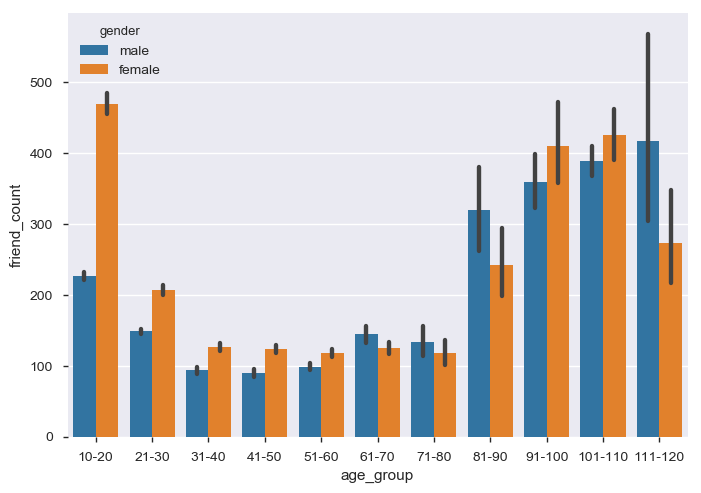

In [16]:
#Females have more friends than males

sns.barplot(x=facebook['age_group'],y=facebook['friend_count'],hue=facebook.gender)

In [17]:
#Number of people having friends

np.count_nonzero(facebook.friend_count)

97041

In [18]:
#All the people having zero friends

friendcount=facebook.friend_count==0
friendcount.value_counts()

False    97041
True      1962
Name: friend_count, dtype: int64

Conclusion: This infers that Males have more zero friends than females

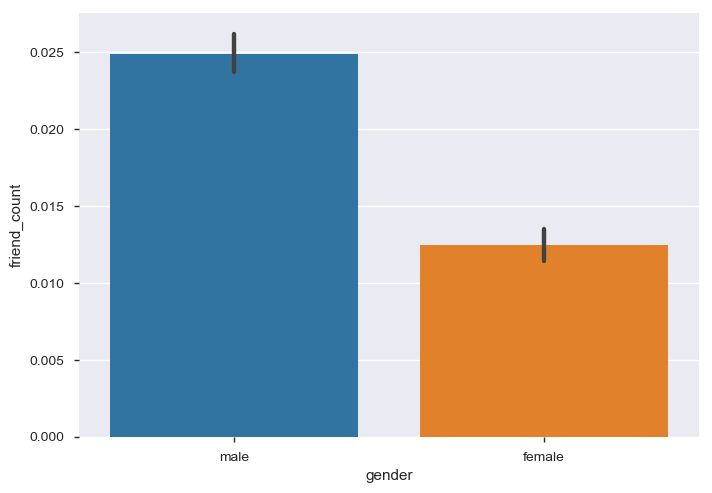

In [19]:
#plotting the gender vs zero friend count people
#friendcount=facebook.friend_count==0
sns.barplot(y=facebook.friend_count==0,x=facebook.gender)

In [20]:
fcmale=(facebook.friend_count==0) & (facebook.gender=='male')
fcmale.value_counts(dropna=False)

fcfemale=(facebook.friend_count==0) & (facebook.gender=='female')
fcfemale.value_counts(dropna=False)

fc=facebook.friend_count==0
fc.value_counts()

False    97041
True      1962
Name: friend_count, dtype: int64

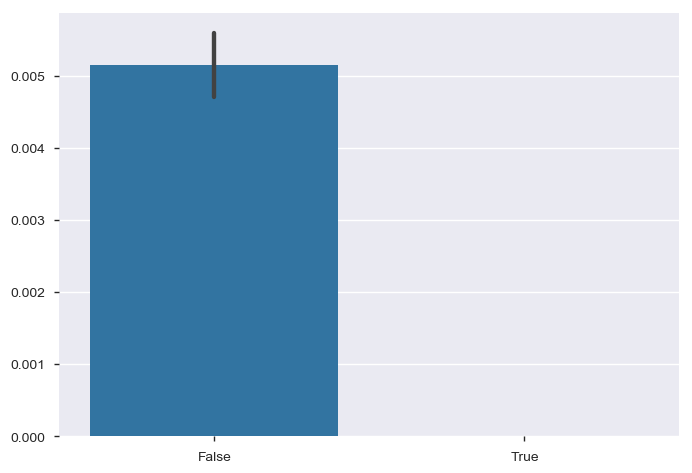

In [21]:
sns.barplot(x=fcmale,y=fcfemale)

Dividing tenure to labels

In [22]:
facebook.tenure.interpolate(inplace=True)

In [23]:
tenlabel=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
facebook['year_group']=pd.cut(facebook.tenure,bins=np.arange(0,3300,365),labels=tenlabel,right=True)

In [24]:
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year


In [25]:
facebook.year_group.fillna(value='0-1 year',inplace=True)

In [26]:
facebook.year_group.value_counts(dropna=False)

0-1 year     43659
1-2 years    33366
2-3 years     9861
3-4 years     5448
4-5 years     4557
5-6 years     1507
6-7 years      581
7-8 years       15
8-9 years        9
Name: year_group, dtype: int64

As we can see 0- 2 years has highest number of users time spent on fb 

In [27]:
#Most liked people

facebook.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20,0-1 year
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years


In [28]:
#Calculating likes per day
facebook['likes_per_day']=facebook.likes_received/facebook.tenure.where(facebook.tenure>0)
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


In [29]:
#Top 10 users getting highest likes received

facebook.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,651.364090
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,704.213439
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years,215.622695
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,263.743781
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years,138.629195
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20,0-1 year,218.506122
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,1038.509804
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years,34.207646
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years,43.492828
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years,47.519231


In [30]:
#Highest likes received per day

facebook.sort_values(by='likes_per_day',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day
94996,1149300,24,7,1989,3,female,2.0,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,2702.000000
94057,2175941,18,25,1995,2,male,2.0,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,1271.000000
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,1038.509804
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,704.213439
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,651.364090
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,638.666667
61145,1409983,47,8,1966,10,female,4.0,123,61,3331,1200,3331,468,0,732,41-50,0-1 year,300.000000
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,263.743781
76025,1494406,17,1,1996,1,female,2.0,215,185,292,478,292,244,0,234,10-20,0-1 year,239.000000
75126,1546811,39,11,1974,12,female,29.0,212,145,8091,6730,3181,2457,4910,4273,31-40,0-1 year,232.068966


In [31]:
#Extracting famous people

famous=facebook.sort_values(by='likes_per_day',ascending=False)[:10]
famous.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day
94996,1149300,24,7,1989,3,female,2.0,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,2702.000000
94057,2175941,18,25,1995,2,male,2.0,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,1271.000000
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,1038.509804
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,704.213439
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,651.364090


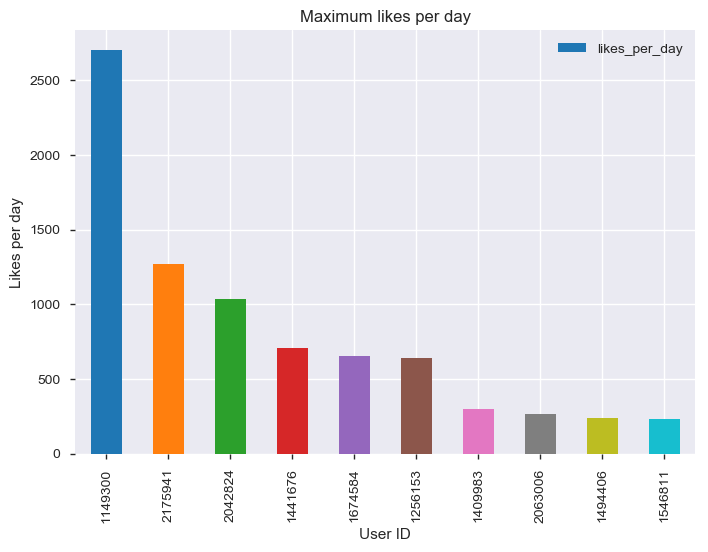

In [32]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
famous.plot(x='userid',y='likes_per_day',kind='bar')
plt.ylabel("Likes per day")
plt.xlabel("User ID")
plt.title("Maximum likes per day")
plt.show()

Conclusion: As we can see from the above Barplot UserId:1149300 has 2700 likes per day,1546811 has 250 likes per day 

In [33]:
#pivot table

facebook.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='age_group',columns='gender')

mobile_likes             mobile_likes_received             \
gender          female        male                female       male   
age_group                                                             
10-20       248.751005   70.219224            288.892095  55.170300   
21-30       165.645013   58.071649            142.788701  35.941683   
31-40       174.898677   45.905372            106.549275  26.976407   
41-50       176.355380   55.884914             97.832104  32.869807   
51-60       133.077017   56.071445             72.727291  29.567209   
61-70       111.957092   55.918953             60.727248  35.572059   
71-80        78.029292   28.853731             32.637103  31.115423   
81-90       109.277922   58.152745             74.779221  54.212411   
91-100      119.665996  112.838068             84.623742  74.919034   
101-110     103.120637   86.164914            102.235964  74.643403   
111-120      97.717949   48.956140             70.205128  39.491228   

            www_likes            www_likes_received             
gender         female       male             female       male  
age_group                                                       
10-20      130.071009  32.523265         197.664228  37.188514  
21-30       54.734040  15.024963          89.672343  21.587317  
31-40       50.029437  10.627516          68.240614  16.021157  
41-50       76.554821  17.016696          80.625032  21.322600  
51-60      105.640317  31.587360          72.171510  24.054958  
61-70      106.303088  47.149480          64.030883  30.433617  
71-80       84.175753  46.256716          34.965826  48.339303  
81-90       49.355844  48.704057          39.555844  38.513126  
91-100      61.603622  54.348011          53.507042  47.926136  
101-110     78.595599  44.470363          64.423369  40.510516  
111-120     67.606838  33.938596          56.555556  28.122807

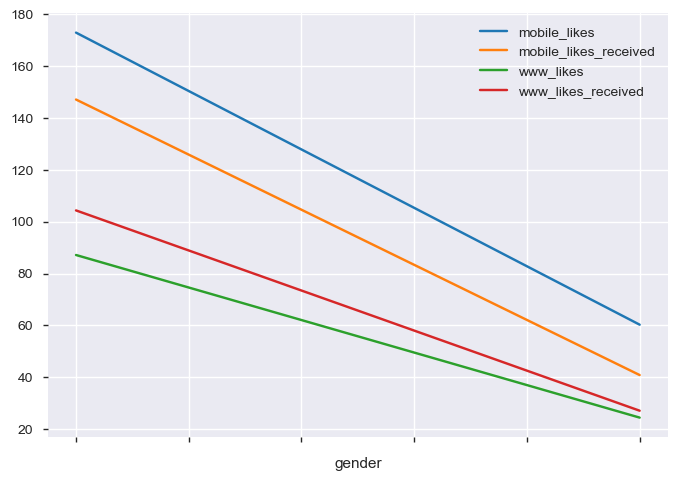

In [34]:
facebook.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='gender').plot()

Conclusion: As we observe the pattern of facebook likes Mobile has more with (180 and 160) compared to Web likes (110 and 90)

In [35]:
#Getting those people who are most interested in sending friend requests

facebook.sort_values(by='friendships_initiated',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,38.294416
98842,1052695,22,23,1991,9,female,874.0,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,2.295195
98675,1949247,19,9,1994,11,female,434.0,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,6.587558
98567,1205425,60,17,1953,6,female,1562.0,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,0.843790
98347,1403953,19,11,1994,11,male,519.0,3693,3415,170,20,170,19,0,1,10-20,1-2 years,0.038536
98960,1745067,17,1,1996,1,female,947.0,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,8.643083
98898,2010847,18,10,1995,2,female,1084.0,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,1.893911
98949,1103175,15,24,1998,8,female,487.0,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,12.683778
98685,1934087,19,19,1994,5,male,575.0,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,5.347826
98835,1075221,22,23,1991,5,male,907.0,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,1.045204


In [36]:
followers=facebook.sort_values(by='friendships_initiated',ascending=False)[:10]

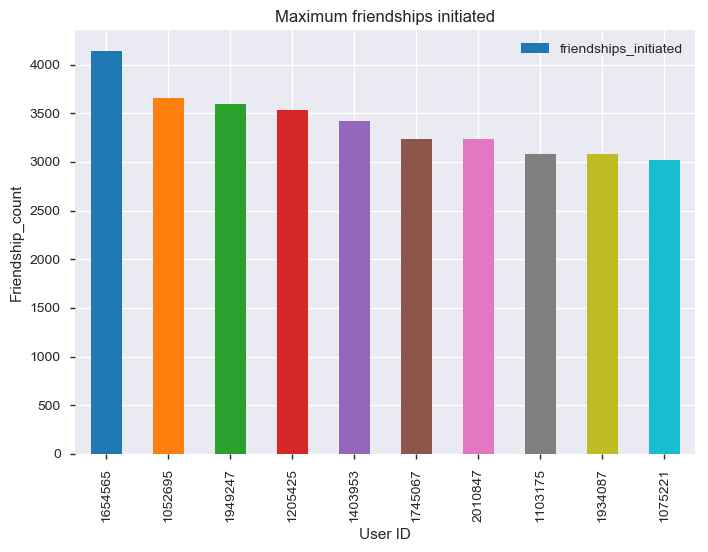

In [37]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
followers.plot(x='userid',y='friendships_initiated',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title("Maximum friendships initiated")
plt.show()

Conclusion: userId 1654565 has most friendships initiated and least being 1075221

In [38]:
followers['fc_per_day']=followers.friendships_initiated / followers.tenure
followers

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_per_day,fc_per_day
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,38.294416,10.517766
98842,1052695,22,23,1991,9,female,874.0,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,2.295195,4.180778
98675,1949247,19,9,1994,11,female,434.0,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,6.587558,8.281106
98567,1205425,60,17,1953,6,female,1562.0,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,0.843790,2.265045
98347,1403953,19,11,1994,11,male,519.0,3693,3415,170,20,170,19,0,1,10-20,1-2 years,0.038536,6.579961
98960,1745067,17,1,1996,1,female,947.0,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,8.643083,3.419219
98898,2010847,18,10,1995,2,female,1084.0,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,1.893911,2.982472
98949,1103175,15,24,1998,8,female,487.0,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,12.683778,6.336756
98685,1934087,19,19,1994,5,male,575.0,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,5.347826,5.353043
98835,1075221,22,23,1991,5,male,907.0,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,1.045204,3.334068


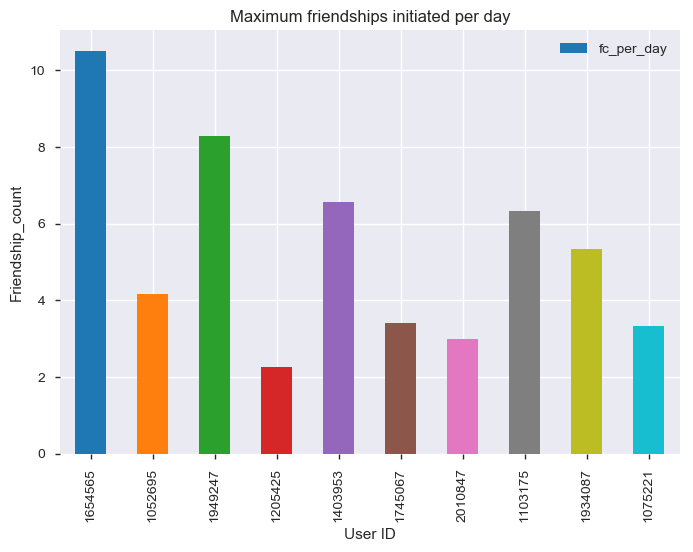

In [39]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
followers.plot(x='userid',y='fc_per_day',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title('Maximum friendships initiated per day')
plt.show()

Conclusion: As we can see in the above plot above Id: 1654565 has got 10 + friendships initiated and least being the id: 1205425 with 2 